In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.constants

def line_profile(amplitude, center, fwhm, x):
    sgm = fwhm / (2.0 * np.sqrt(2.0 * np.log(2.0)))
    arg = -(x-center)**2 / (2.0 * sgm**2)
    y = amplitude * np.exp(arg) / sgm / np.sqrt(2.0 * scipy.constants.pi)
    return y

In [3]:
d_wl = 0.005  # [A]
wl_range = [1100.0, 1900.0]
nw = int((wl_range[1]-wl_range[0]) / d_wl)  # [A]
wl = np.linspace(wl_range[0], wl_range[1], nw)

In [4]:
# [erg/s/cm2/arcsec2/A]
I_Lya = 6.1e-13   # 20kR (HST daytime)
w_Lya = 1215.67
I = line_profile(I_Lya, w_Lya, 0.04, wl) 

HST STIS E140M

In [5]:
# 逆線分散: スリット面上での単位長さあたりの波長差。これにスリット幅を掛けると波長分解の指標となる。
# HST STIS E140M
d = 1215.67/91700.0 # A/pix
#print(d)
m = 0.036 # arcsec/pix
w = 0.2 # arcsec
ild = d / m
sgm = ild * w

nw_ = int(2.0 / d_wl)
wl_ = np.linspace(-1.0, 1.0, nw_)
I_inst = line_profile(1.0, 0.0, sgm, wl_)

I_conv = np.convolve(I, I_inst*d_wl, mode = 'same')

In [6]:
print(sgm)

0.07365018781049316


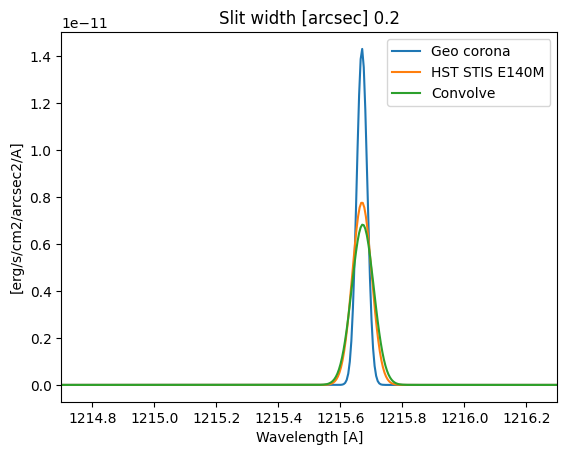

In [7]:
plt.plot(wl, I, label='Geo corona')
plt.plot(wl_+w_Lya, I_inst*I_Lya, label='HST STIS E140M')
plt.plot(wl, I_conv, label='Convolve')
#plt.yscale('log')
plt.title('Slit width [arcsec] '+str(w))
plt.ylabel('[erg/s/cm2/arcsec2/A]')
plt.xlabel('Wavelength [A]')
plt.xlim([1214.7,1216.3])
plt.legend()

LAPYUTA MRS

In [8]:
# 逆線分散: スリット面上での単位長さあたりの波長差。これにスリット幅を掛けると波長分解の指標となる。
# LAPYUTA MRS
d = 0.1 # A/pix
m = 0.055 # arcsec/pix
w = 0.27 # arcsec
#w = 5.5 # arcsec
ild = d / m
sgm = ild * w

nw_ = int(80.0 / d_wl)
wl_ = np.linspace(-40.0, 40.0, nw_)
I_inst = line_profile(1.0, 0.0, sgm, wl_)

I_conv = np.convolve(I, I_inst*d_wl, mode = 'same')

In [9]:
print(sgm)

0.49090909090909096


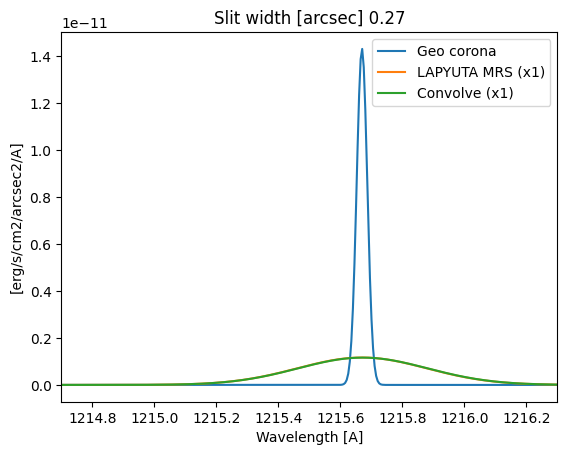

In [10]:
#factor = 10
factor = 1
plt.plot(wl, I, label='Geo corona')
plt.plot(wl_+w_Lya, I_inst*I_Lya*factor, label='LAPYUTA MRS (x'+str(factor)+')')
plt.plot(wl, I_conv*factor, label='Convolve (x'+str(factor)+')')
#plt.yscale('log')
plt.ylabel('[erg/s/cm2/arcsec2/A]')
plt.xlabel('Wavelength [A]')
plt.xlim([1214.7,1216.3])
#plt.xlim([1210.7,1220.3])
#plt.xlim([1200.7,1240.3])
plt.title('Slit width [arcsec] '+str(w))
plt.legend()

LAPYUTA HRS

In [11]:
# 逆線分散: スリット面上での単位長さあたりの波長差。これにスリット幅を掛けると波長分解の指標となる。
# LAPYUTA HRS
d = 0.015 # A/pix
m = 0.3 # arcsec/pix
w = 1 # arcsec
ild = d / m
sgm = ild * w

nw_ = int(2.0 / d_wl)
wl_ = np.linspace(-1.0, 1.0, nw_)
I_inst = line_profile(1.0, 0.0, sgm, wl_)

I_conv = np.convolve(I, I_inst*d_wl, mode = 'same')

In [12]:
print(sgm)

0.05


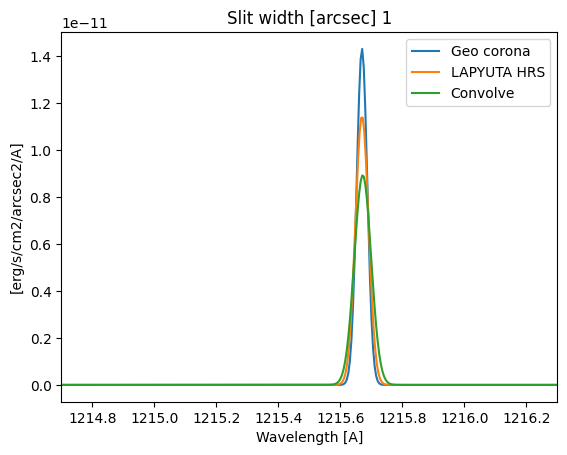

In [13]:

plt.plot(wl, I, label='Geo corona')
plt.plot(wl_+w_Lya, I_inst*I_Lya, label='LAPYUTA HRS')
plt.plot(wl, I_conv, label='Convolve')
#plt.yscale('log')
plt.ylabel('[erg/s/cm2/arcsec2/A]')
plt.xlabel('Wavelength [A]')
plt.xlim([1214.7,1216.3])
plt.title('Slit width [arcsec] '+str(w))
plt.legend()